# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
data = pd.read_csv(data_url)

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1028.0,36.999027,9.444297,18.0,30.00,36.0,43.00,60.0
Attrition,1028.0,0.167315,0.373439,0.0,0.00,0.0,0.00,1.0
DailyRate,1028.0,806.551556,407.043735,102.0,465.75,813.0,1157.25,1499.0
DistanceFromHome,1028.0,9.010700,8.078418,1.0,2.00,7.0,13.00,29.0
Education,1028.0,2.873541,1.032840,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1028.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1028.0,710.198444,418.513656,1.0,351.75,701.5,1069.25,1447.0
EnvironmentSatisfaction,1028.0,2.719844,1.089614,1.0,2.00,3.0,4.00,4.0
HourlyRate,1028.0,65.451362,20.274229,30.0,48.00,65.0,83.00,100.0
JobInvolvement,1028.0,2.731518,0.703240,1.0,2.00,3.0,3.00,4.0


In [6]:
left = data.groupby('Attrition')
left.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.712617,815.773364,8.696262,2.892523,1.0,705.167056,2.778037,65.619159,2.781542,2.179907,2.806075,6988.733645,14162.245327,2.655374,15.158879,3.151869,2.757009,0.818925,12.059579,2.792056,2.783879,7.476636,4.523364,2.257009,4.385514,509.935748
1,33.447674,760.656977,10.575581,2.779070,1.0,735.238372,2.430233,64.616279,2.482558,1.662791,2.517442,4860.058140,14648.069767,2.906977,15.238372,3.156977,2.610465,0.459302,8.220930,2.656977,2.662791,5.226744,2.970930,1.976744,2.924419,531.238372


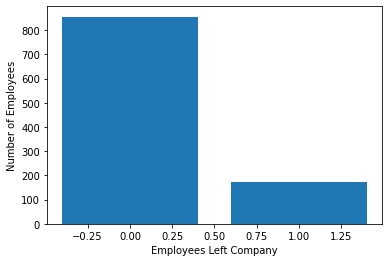

In [7]:
left_count=data.groupby('Attrition').count()
plt.bar(left_count.index.values, left_count['ID'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

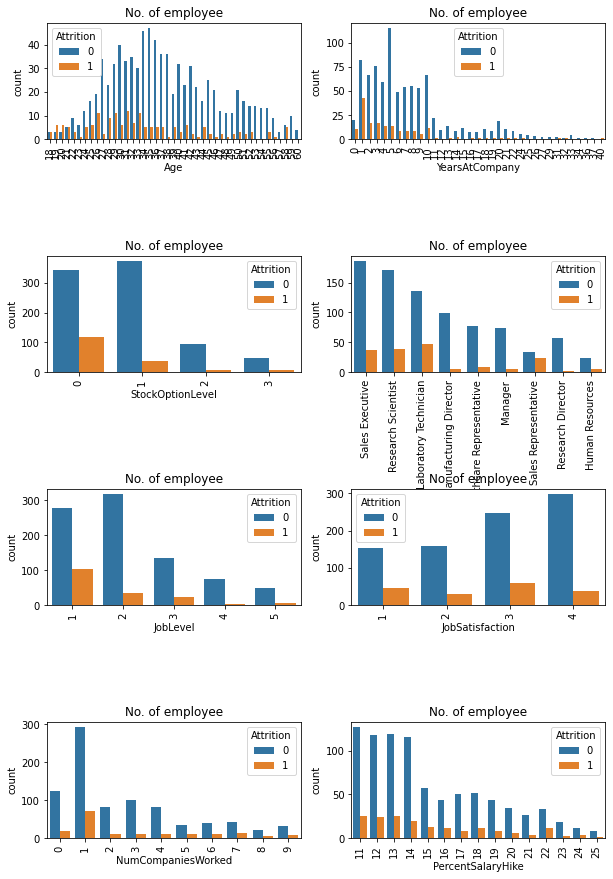

In [8]:
features=['Age','YearsAtCompany','StockOptionLevel','JobRole','JobLevel','JobSatisfaction','NumCompaniesWorked','PercentSalaryHike']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

Preprocessing


In [0]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['BusinessTravel']=le.fit_transform(data['BusinessTravel'])
data['Department']=le.fit_transform(data['Department'])
data['EducationField']=le.fit_transform(data['EducationField'])
data['JobRole']=le.fit_transform(data['JobRole'])
data['OverTime']=le.fit_transform(data['OverTime'])
data['MaritalStatus']=le.fit_transform(data['MaritalStatus'])
data['Gender']=le.fit_transform(data['Gender'])

In [0]:
#Spliting data into Feature and
data_vars=data.columns.values.tolist()
yc=['Attrition']
Xc=[i for i in data_vars if i not in yc]
X=data[['Age','Department', 'DistanceFromHome',  'EnvironmentSatisfaction','Gender', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PercentSalaryHike','PerformanceRating',  'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion']]
#print(Xc)
y=data[yc]

In [0]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

Implement a minimum of three classifiers (e.g. RandomForestClassifier, XGBClassifier, DecisionTreeClassifier, KNeighborsClassifier, etc.) 

In [12]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import RandomForestClassifier

#Create Gradient Boosting Classifier
rf = RandomForestClassifier()

#Train the model using the training sets
rf.fit(X_train, y_train)
#gb.fit(X,y)
#Predict the response for test dataset
y_pred = rf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8673139158576052
Precision: 0.5714285714285714
Recall: 0.18604651162790697


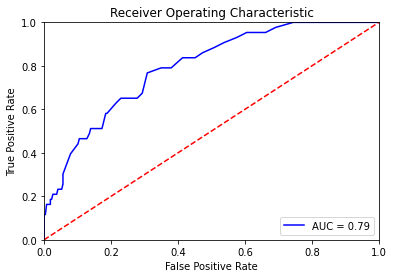

In [14]:
probs =rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn.tree import DecisionTreeClassifier

#Create Gradient Boosting Classifier
dt = DecisionTreeClassifier()

#Train the model using the training sets
dt.fit(X_train, y_train)
#gb.fit(X,y)
#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7864077669902912
Precision: 0.27450980392156865
Recall: 0.32558139534883723


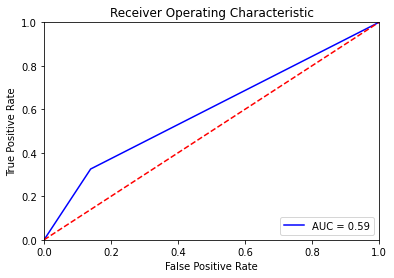

In [17]:
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  